In [ ]:
# K 최근접 이웃 알고리즘

In [18]:
import numpy as np

np.random.seed(10)

X = np.random.random((10,2))
X

array([[0.77132064, 0.02075195],
       [0.63364823, 0.74880388],
       [0.49850701, 0.22479665],
       [0.19806286, 0.76053071],
       [0.16911084, 0.08833981],
       [0.68535982, 0.95339335],
       [0.00394827, 0.51219226],
       [0.81262096, 0.61252607],
       [0.72175532, 0.29187607],
       [0.91777412, 0.71457578]])

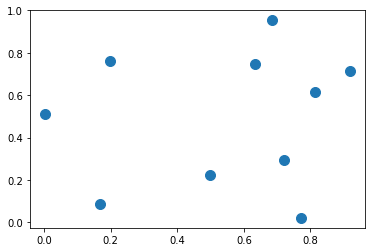

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

#산점도
plt.scatter(X[:,0], X[:,1], s=100)

In [23]:
# 각 쌍의 점 사이의 거리를 계산
# 각 쌍의 점 사이의 좌표 차이를 구한 후 제곱
# 제곱 거리를 구하기 위해 좌표 차이를 더한다
dist_sq = np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:]) **2, axis=-1)

# 검증 : 행렬의 대각선이 0인지 확인_대각선 : 자신과 자신 사이의 거리 집합
esti = dist_sq.diagonal()
print(esti)

# 제곱 거리 반환
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0 8 2 7 4 9 1 6 3 5]
 [1 5 7 9 3 8 2 6 0 4]
 [2 8 0 4 7 1 6 3 9 5]
 [3 6 1 5 2 7 4 8 9 0]
 [4 2 6 8 0 3 1 7 9 5]
 [5 1 9 7 3 8 2 6 0 4]
 [6 3 4 2 1 8 5 7 0 9]
 [7 9 1 8 5 2 0 3 6 4]
 [8 2 0 7 1 9 4 5 3 6]
 [9 7 1 5 8 2 0 3 6 4]]


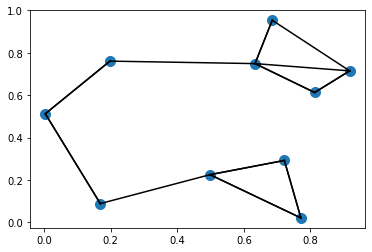

In [28]:
# 가장 가까운 K 이웃을 구함
k=2
nearest_partition = np.argpartition(dist_sq, k+1, axis=1)

# 이웃의 네트워크를 시각화_ 가장 가까운 두 개의 이웃과 연결
plt.scatter(X[:,0], X[:,1], s=100)

k=2
for i in range(X.shape[0]):
    for j in nearest_partition[i,:k+1]:
        # X[i]부터 X[j]까지 선으로 이음
        # zip 매직함수 이용
        plt.plot(*zip(X[j], X[i]), color='black')